### MLB Ballpark Research

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

### Research Question

Will stadiums with smaller outfield distances be easier to hit HR, or in another word, will stadiums with larger distances will be more difficult to hit a HR?

### Data Cleaning

In [2]:
hr_count = pd.read_csv("data/21-23hr.csv")
ballpark = pd.read_csv("data/ballparks.csv")

In [3]:
hr_count.head()

,ballpark,city,2023,2022,2021
0,Globe Life Field,Arlington,256,198,194
1,Truist Park,Atlanta,250,190,210
2,Great American Ball Park,Cincinnati,243,217,250
3,Dodger Stadium,Los Angeles,238,196,231
4,Yankee Stadium,Bronx,231,207,219


In [4]:
ballpark.head()

,team_name,ballpark,left_field,center_field,right_field,min_wall_height,max_wall_height,hr_park_effects,extra_distance,avg_temp,elevation,roof,daytime
0,ATL,Truist Park,335,400,325,11.0,15,99,1.8,79.2,1001,0.00,0.31
1,AZ,Chase Field,328,407,335,7.6,25,84,13.2,80.8,1086,0.81,0.31
2,BAL,Oriole Park,333,400,318,7.0,21,107,-0.5,76.4,33,0.00,0.35
3,BOS,Fenway Park,310,420,302,3.0,37,102,-4.7,69.5,21,0.00,0.31
4,CHC,Wrigley Field,355,400,353,11.5,15,97,-3.4,70.2,595,0.00,0.55


In [5]:
hr_count.isnull().sum()

ballpark    0
city        0
2023        0
2022        0
2021        0
dtype: int64

In [6]:
ballpark.isnull().sum()

team_name          0
ballpark           0
left_field         0
center_field       0
right_field        0
min_wall_height    0
max_wall_height    0
hr_park_effects    0
extra_distance     0
avg_temp           0
elevation          0
roof               0
daytime            0
dtype: int64

I will create a new dataframe, which has 6 columns which are : [team, stadium, lf, cf, rf, hr] <br>
team: team name; stadium: team stadium name; lf: left field distance; cf: center field distance; rf: right field distance;
rf: right field distance; hr: HR per game in this stadium from 2021 to 2023 <br>
Every stadium should hold 81 games in each season. However, in 2021 Torento Blue Jays only jave 32 home games, and in 2023, San Diego Padres and St. Louis Cardinals only have 79 home games due to international series. This is why I choose to use HR per game instead of HR number. <br>

In [7]:
hr_lst = []
for i in ballpark["ballpark"]:
    df = hr_count[hr_count["ballpark"] == i]
    if i == "Petco Park":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 79)
    if i == "Busch Stadium":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 79)
    if i == "Rogers Centre":
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (81 + 81 + 32)
    else:
        hr = (df["2023"].iloc[0] + df["2022"].iloc[0] + df["2021"].iloc[0]) / (3 * 81)
    hr_lst.append(hr)
hr_count["hr"] = hr_lst

In [8]:
hr_count.head()

,ballpark,city,2023,2022,2021,hr
0,Globe Life Field,Arlington,256,198,194,2.674897
1,Truist Park,Atlanta,250,190,210,1.975309
2,Great American Ball Park,Cincinnati,243,217,250,2.469136
3,Dodger Stadium,Los Angeles,238,196,231,2.341564
4,Yankee Stadium,Bronx,231,207,219,2.473251


In [9]:
left_df = ballpark[["team_name", "ballpark", "left_field", "center_field", "right_field"]]
right_df = hr_count[["ballpark", "hr"]]

In [10]:
df = left_df.merge(right_df, left_on = "ballpark", right_on = "ballpark")
df.head()

,team_name,ballpark,left_field,center_field,right_field,hr
0,ATL,Truist Park,335,400,325,1.975309
1,AZ,Chase Field,328,407,335,2.666667
2,BAL,Oriole Park,333,400,318,2.349794
3,BOS,Fenway Park,310,420,302,2.156379
4,CHC,Wrigley Field,355,400,353,2.600823


In [11]:
df.columns = ["team", "stadium", "lf", "cf", "rf", "hr"]
df.head()

,team,stadium,lf,cf,rf,hr
0,ATL,Truist Park,335,400,325,1.975309
1,AZ,Chase Field,328,407,335,2.666667
2,BAL,Oriole Park,333,400,318,2.349794
3,BOS,Fenway Park,310,420,302,2.156379
4,CHC,Wrigley Field,355,400,353,2.600823


In [12]:
# add all the features' values to the last row
avg_row = ["AVG", "NA"]
for i in range(0, 4):
    avg_row.append(df.describe().loc["mean"][i])
df.loc[30] = avg_row

### EDA

I will get top and bottom 5 team/stadium in HR and oyt field distances in two dataframes to see whether these teams are corrsponding. <br>

In [13]:
def get_5(value, order):
    df5 = df.sort_values(by = value, ascending = (order == "bottom"), inplace = False).head()
    return list(df5.iloc[:, 0])

In [14]:
# top 5 teams in hr and bottom 5 teams in lf, cf, and rf
top_5_hr_teams = pd.DataFrame(columns = ["hr", "lf", "cf", "rf"])
top_5_hr_teams["hr"] = get_5("hr", "top")
top_5_hr_teams["lf"] = get_5("lf", "bottom")
top_5_hr_teams["cf"] = get_5("cf", "bottom")
top_5_hr_teams["rf"] = get_5("rf", "bottom")
top_5_hr_teams

,hr,lf,cf,rf
0,LAA,BOS,LAD,BOS
1,HOU,TB,SD,SF
2,KC,HOU,LAA,NYY
3,TEX,NYY,SF,BAL
4,AZ,CLE,PIT,PIT


In [15]:
# bottom 5 teams in hr and top 5 teams in lf, cf, and rf
bottom_5_hr_teams = pd.DataFrame(columns = ["hr", "lf", "cf", "rf"])
bottom_5_hr_teams["hr"] = get_5("hr", "bottom")
bottom_5_hr_teams["lf"] = get_5("lf", "top")
bottom_5_hr_teams["cf"] = get_5("cf", "top")
bottom_5_hr_teams["rf"] = get_5("rf", "top")
bottom_5_hr_teams

,hr,lf,cf,rf
0,OAK,CHC,BOS,CHC
1,NYM,COL,DET,COL
2,SD,DET,COL,MIL
3,WSH,MIL,KC,AZ
4,ATL,MIA,HOU,WSH


From the above two tables, we can see that some teams do appear in a same table. <br>

It is always useful to create some graphs to figure out is there any relationship between different variables.

In [16]:
# help functions to draw figure
def rank(var):
    new_df = df.iloc[0: 30]
    sorted_df = new_df.sort_values(by = var)
    return sorted_df

def get_max(var):
    rank_df = rank(var)
    return rank_df[var].iloc[-1]

def get_min(var):
    rank_df = rank(var)
    return rank_df[var].iloc[0]

def get_avg(var):
    return df[var].iloc[30]

# paint function
def draw(x, y):
    sns.set_theme()
    fig = plt.figure(figsize = (18, 10))
    fig = sns.scatterplot(data = df, x = x, y = y, hue = "team", s = 50)
    min_x = get_min(x)
    max_x = get_max(x)
    avg_x = get_avg(x)
    min_y = get_min(y)
    max_y = get_max(y)
    avg_y = get_avg(y)
    x_gap = (int(max_x) + 1 - int(min_x) + 1) / 20
    y_gap = (max_y - min_y) / 10
    fig.set_xticks(np.arange(min_x - x_gap, max_x + x_gap, x_gap))
    fig.set_yticks(np.arange(min_y - y_gap, max_y + y_gap, y_gap))
    fig = sns.lineplot(x = [min_x, max_x], y = avg_y, color = "blue", linewidth = 1, label = "league average HR")
    fig = sns.lineplot(x = avg_x, y = [min_y, max_y], color = "red", label = "league average LF distance")
    fig.set(xlabel = x, ylabel = y, title = x + "-" + y + " graph")
    for i in range(0, df.shape[0]):
        x_index = df[x].iloc[i]
        y_index = df[y].iloc[i]
        team = df["team"].iloc[i]
        fig.text(x_index - x_gap / 2, y_index, team)
    sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

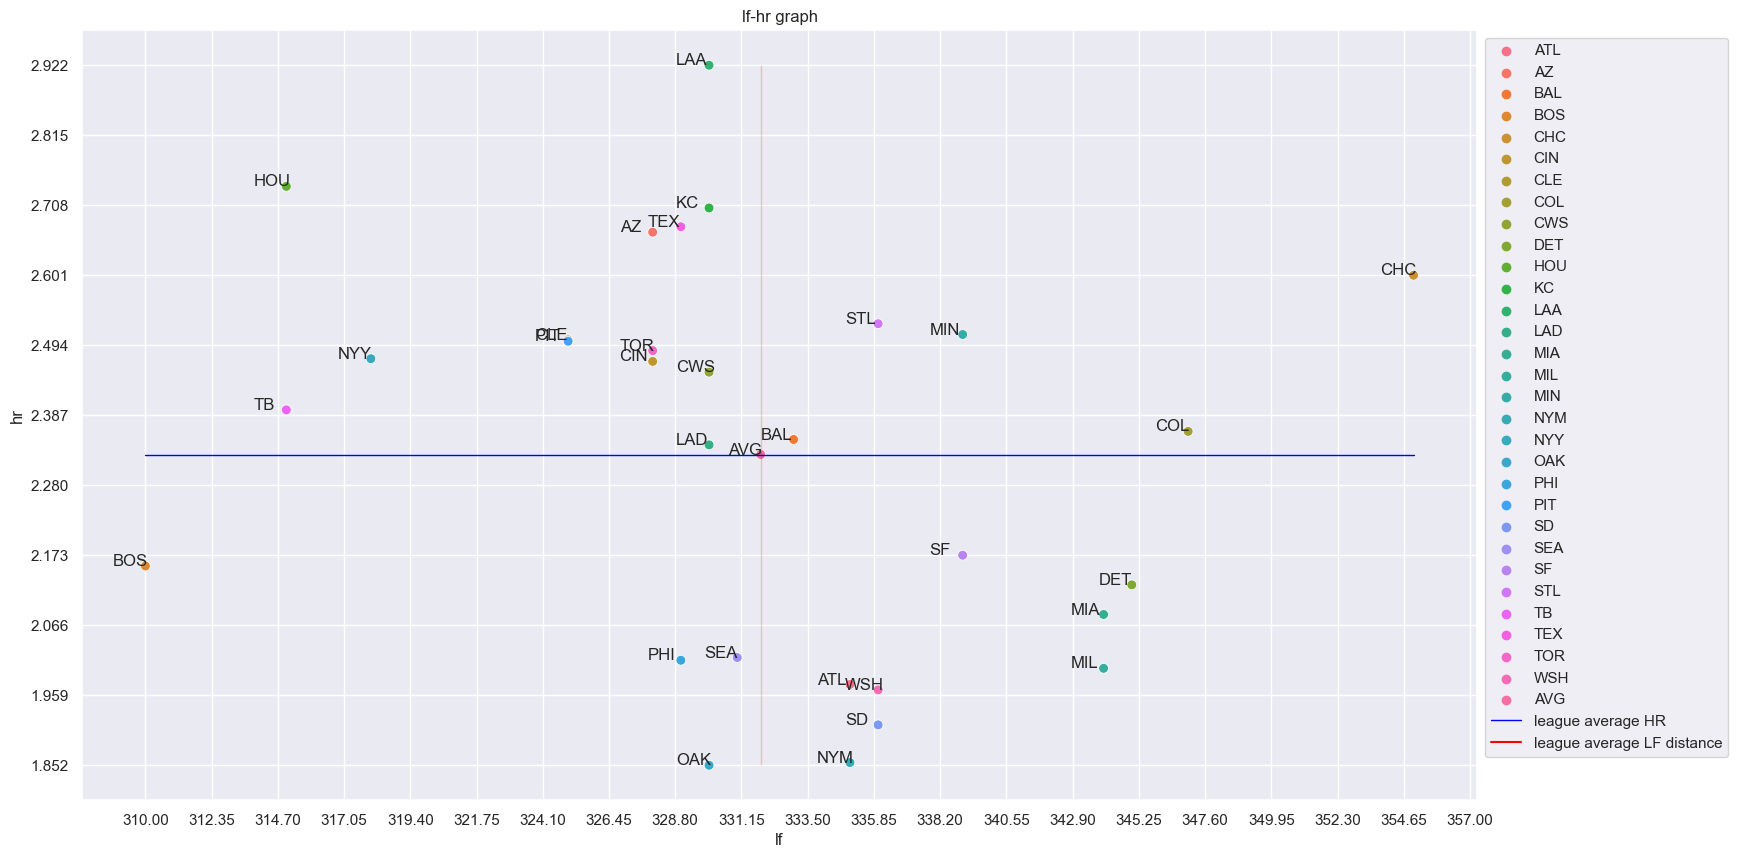

In [23]:
# x = lf, y = hr
draw("lf", "hr")

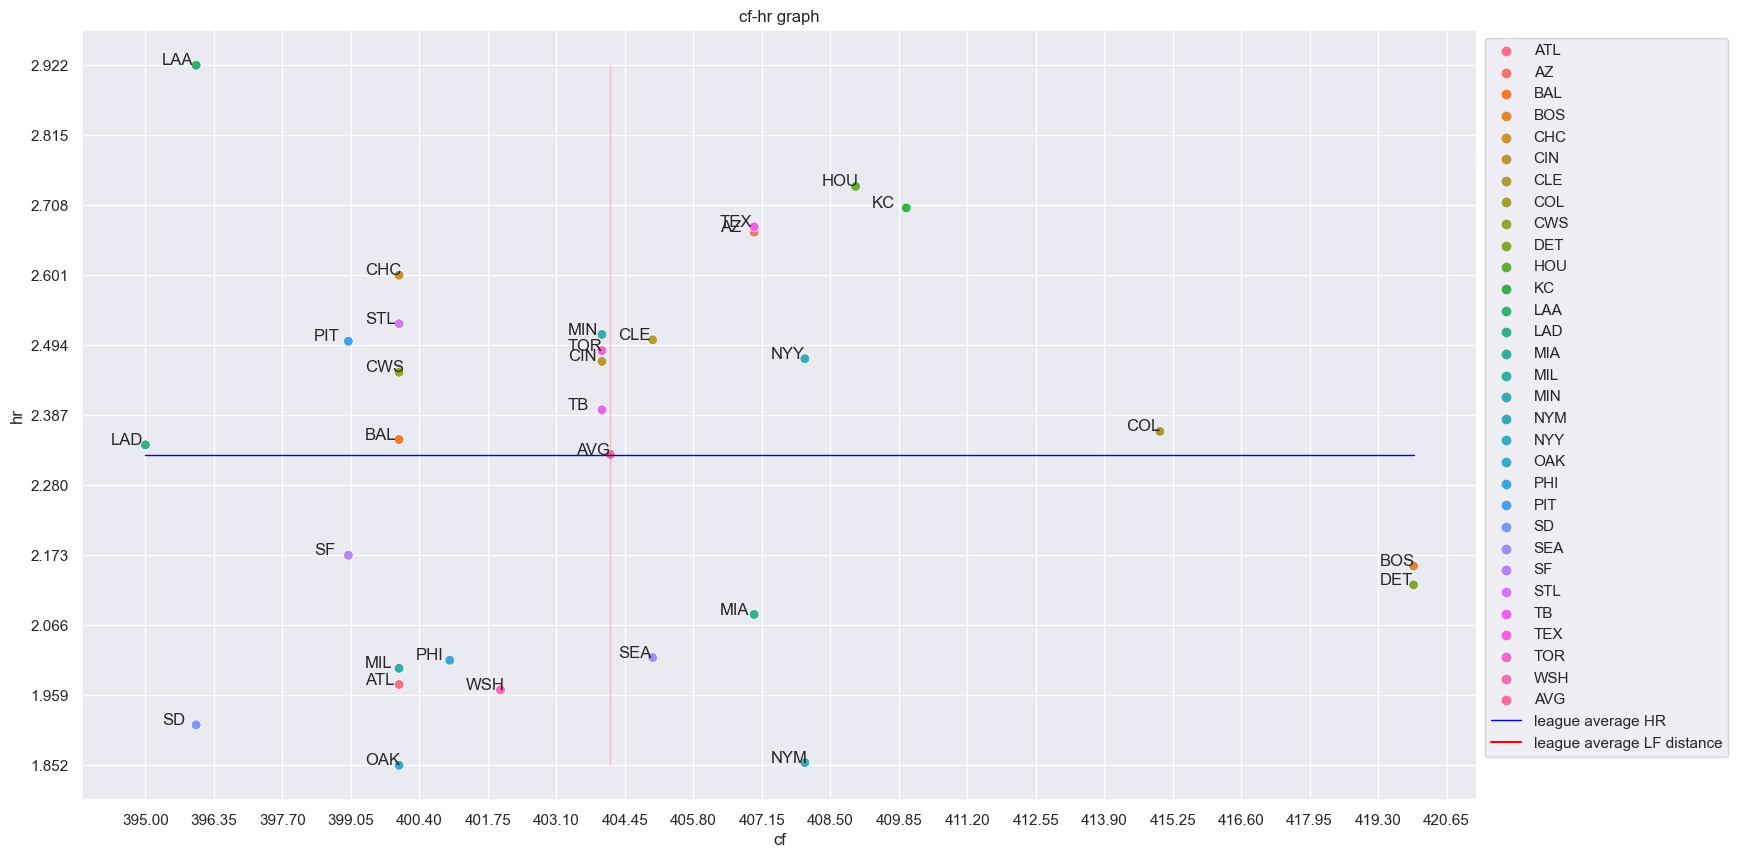

In [18]:
# x = cf, y = hr
draw("cf", "hr")

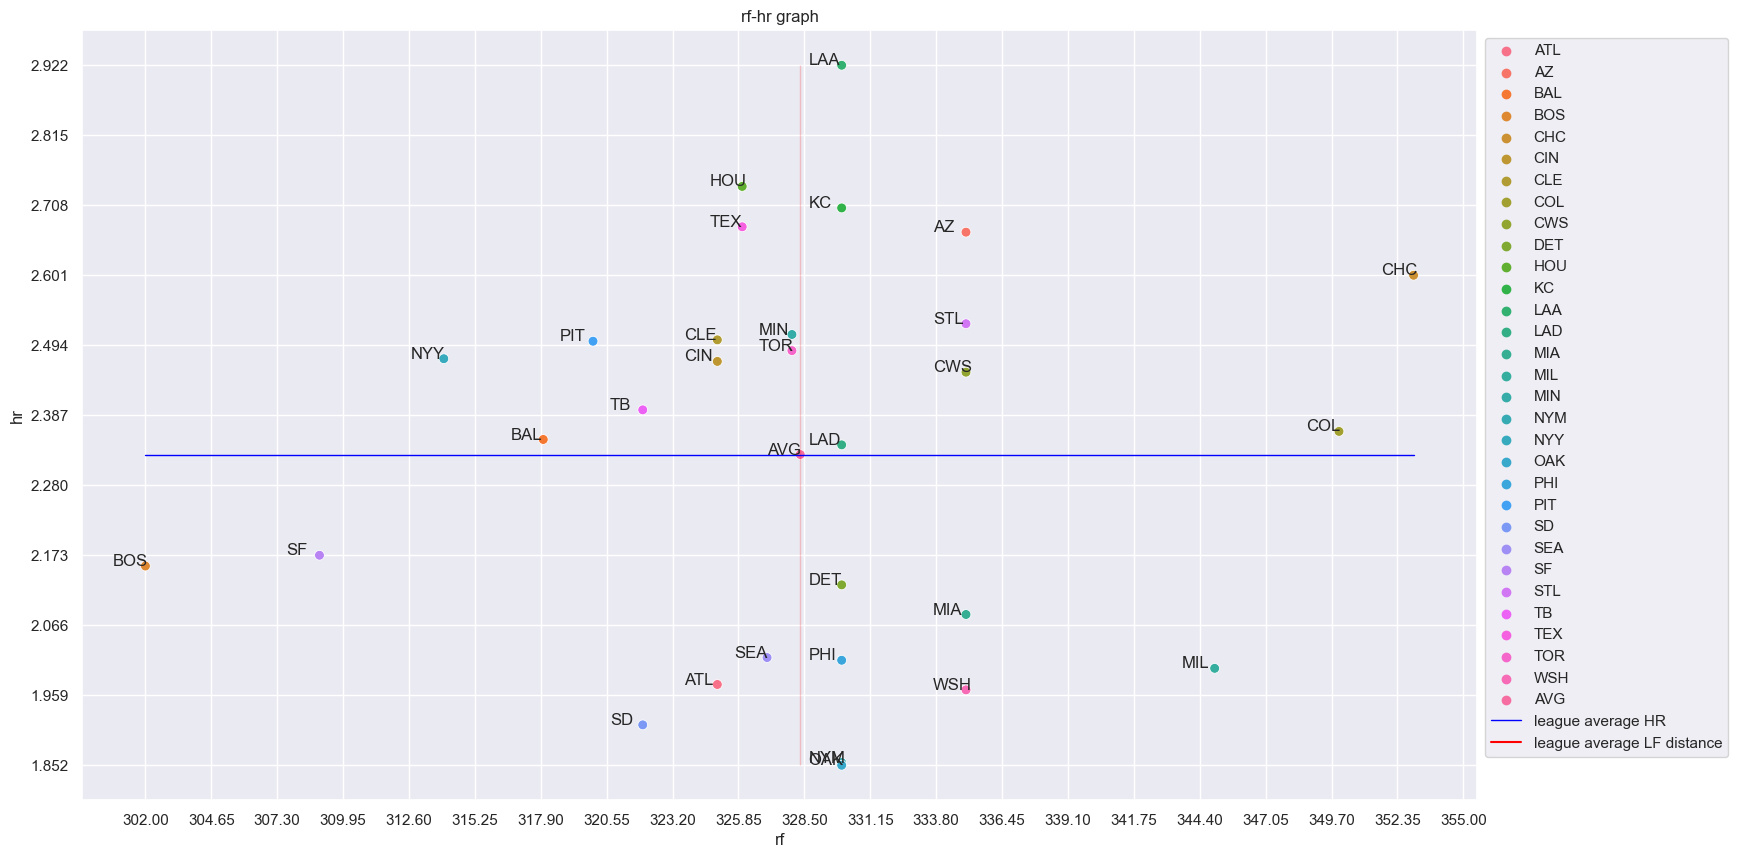

In [19]:
# x = rf, y = hr
draw("rf", "hr")

From the above three graphs, there is no obvious linear relation that we may want to see or expect. However, if we let the point AVG be the original point in a coordinate. We can find out that there is some different in the distribution of the four quadrants. In the following I will find out the number and ratio in each graph and analyze it.

In [33]:
# this will method will return a list with 4 values: number of team's var > avg_var and hr > avg_hr,
# number of team's var < avg_var and hr > avg_hr, number of team's var < avg_var and hr < avg_hr,
# and number of team's var > avg_var and hr < avg_hr,
def get_quadrant(var):
    var_avg = get_avg(var)
    hr_avg = get_avg("hr")
    q1 = df[(df[var] > var_avg) & (df["hr"] > hr_avg)].shape[0]
    q2 = df[(df[var] < var_avg) & (df["hr"] > hr_avg)].shape[0]
    q3 = df[(df[var] < var_avg) & (df["hr"] < hr_avg)].shape[0]
    q4 = df[(df[var] > var_avg) & (df["hr"] < hr_avg)].shape[0]
    return [q1, q2, q3, q4]

In [155]:
# this method will create a dataframe with the given variable
def ratio_table(var):
    [q1, q2, q3, q4] = get_quadrant(var)
    r1 = round(q2 / (q2 + q3), 4) * 100
    r2 = round(q3 / (q2 + q3), 4) * 100
    r3 = round(q1 / (q1 + q4), 4) * 100
    r4 = round(q4 / (q1 + q4), 4) * 100
    col = [var + "-hr", ">avg_" + var, "<avg_" + var]
    ratio_df = pd.DataFrame(columns = col)
    ratio_df.iloc[:, 0] = [">avg_hr", "<avg_hr", "diff"]
    ratio_df.iloc[:, 1] = [per(r3), per(r4), per(r3 - r4)]
    ratio_df.iloc[:, 2] = [per(r1), per(r2), per(r1 - r2)]
    return ratio_df

def per(num):
    num = "{:.2f}%".format(num)
    return num

In [156]:
lf_hr_ratio = ratio_table("lf")
cf_hr_ratio = ratio_table("cf")
rf_hr_ratio = ratio_table("rf")

In [158]:
display(HTML(
    f"""
    <div style="display: flex; justify-content: space-around;">
        <div style="margin-right: 20px;">
            <h5>LF-HR Table</h5>
            {lf_hr_ratio.to_html(index=False)}
        </div>
        <div>
            <h5>CF-HR Table</h5>
            {cf_hr_ratio.to_html(index=False)}
        </div>
        <div>
            <h5>RF-HR Table</h5>
            {rf_hr_ratio.to_html(index=False)}
        </div>
    </div>
    """
))

lf-hr,>avg_lf,<avg_lf
>avg_hr,38.46%,76.47%
<avg_hr,61.54%,23.53%
diff,-23.08%,52.94%
cf-hr,>avg_cf,<avg_cf
>avg_hr,58.33%,61.11%
<avg_hr,41.67%,38.89%
diff,16.66%,22.22%
rf-hr,>avg_rf,<avg_rf
>avg_hr,53.33%,66.67%
<avg_hr,46.67%,33.33%
